In [30]:
#Question 1

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(penguins_url)

# Function to create histograms with marked statistics
def create_histogram_with_stats(species_data, species_name, color):
    fig = make_subplots(rows=3, cols=2, subplot_titles=[
        f'{species_name} Mean', f'{species_name} Median',
        f'{species_name} Full Range', f'{species_name} IQR',
        f'{species_name} 2 Std Dev Range'
    ])
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    std_dev = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    two_std_lower = mean - 2 * std_dev
    two_std_upper = mean + 2 * std_dev

    # Histogram for Mean
    fig.add_trace(go.Histogram(x=species_data, marker_color=color, name='Mean'), row=1, col=1)
    fig.add_vline(x=mean, line=dict(color=color, dash='dash'), annotation_text=f'Mean: {mean:.2f}', row=1, col=1)

    # Histogram for Median
    fig.add_trace(go.Histogram(x=species_data, marker_color=color, name='Median'), row=1, col=2)
    fig.add_vline(x=median, line=dict(color=color, dash='dot'), annotation_text=f'Median: {median:.2f}', row=1, col=2)

    # Histogram for Full Range
    fig.add_trace(go.Histogram(x=species_data, marker_color=color, name='Full Range'), row=2, col=1)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor=color, opacity=0.2, row=2, col=1)

    # Histogram for IQR
    fig.add_trace(go.Histogram(x=species_data, marker_color=color, name='IQR'), row=2, col=2)
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color, opacity=0.2, row=2, col=2)

    # Histogram for 2 Standard Deviations Range
    fig.add_trace(go.Histogram(x=species_data, marker_color=color, name='2 Std Dev Range'), row=3, col=1)
    fig.add_vrect(x0=two_std_lower, x1=two_std_upper, fillcolor=color, opacity=0.2, row=3, col=1)

    fig.update_layout(height=900, width=1000, title_text=f'Flipper Length Distributions and Statistics for {species_name}', showlegend=False)
    return fig

# Generate separate histograms for each species
species_list = penguins['species'].dropna().unique()
colors = ['blue', 'green', 'red']

for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    fig = create_histogram_with_stats(species_data, species, colors[i])
    fig.show()


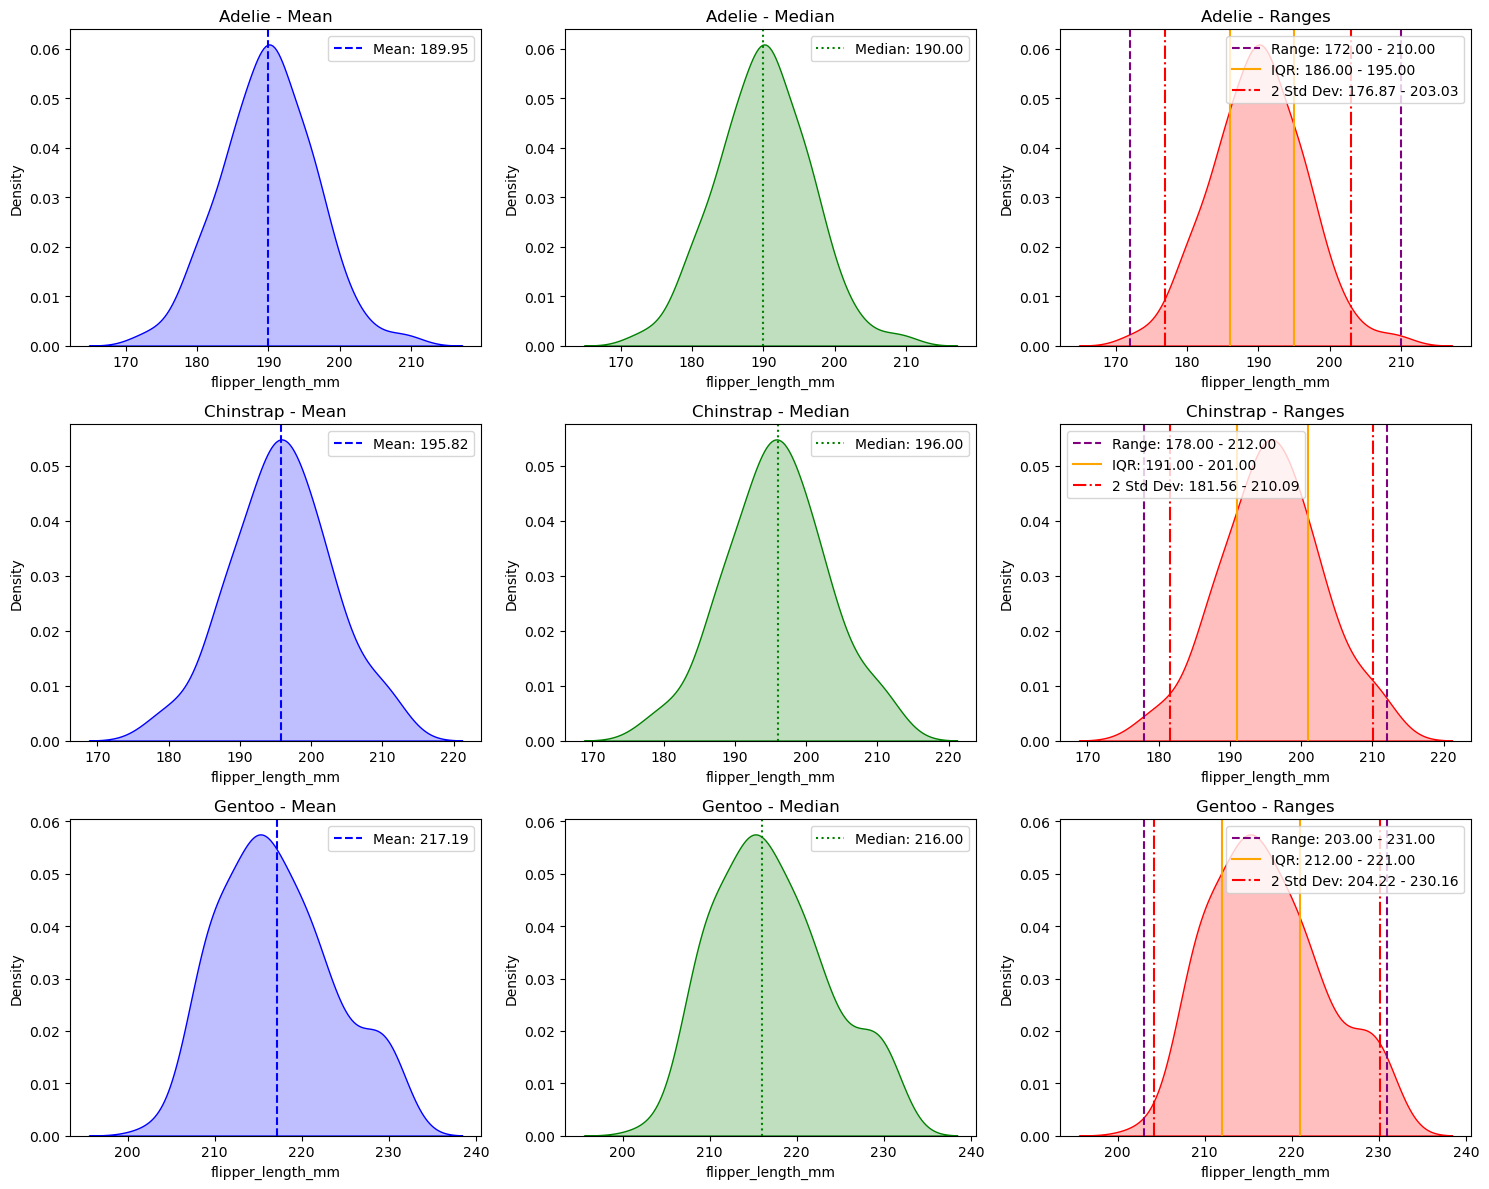

In [5]:
#Question 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(penguins_url)

# Function to create KDE plots with statistical markers
def create_kde_plots(species_data, species_name, ax):
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    min_val = species_data.min()
    max_val = species_data.max()
    std_dev = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    two_std_lower = mean - 2 * std_dev
    two_std_upper = mean + 2 * std_dev

    # Plot KDE with Mean
    sns.kdeplot(species_data, ax=ax[0], color="blue", fill=True)
    ax[0].axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    ax[0].set_title(f"{species_name} - Mean")
    ax[0].legend()

    # Plot KDE with Median
    sns.kdeplot(species_data, ax=ax[1], color="green", fill=True)
    ax[1].axvline(median, color='green', linestyle=':', label=f'Median: {median:.2f}')
    ax[1].set_title(f"{species_name} - Median")
    ax[1].legend()

    # Plot KDE with Ranges
    sns.kdeplot(species_data, ax=ax[2], color="red", fill=True)
    ax[2].axvline(min_val, color='purple', linestyle='--', label=f'Range: {min_val:.2f} - {max_val:.2f}')
    ax[2].axvline(max_val, color='purple', linestyle='--')
    ax[2].axvline(q1, color='orange', linestyle='-', label=f'IQR: {q1:.2f} - {q3:.2f}')
    ax[2].axvline(q3, color='orange', linestyle='-')
    ax[2].axvline(two_std_lower, color='red', linestyle='-.', label=f'2 Std Dev: {two_std_lower:.2f} - {two_std_upper:.2f}')
    ax[2].axvline(two_std_upper, color='red', linestyle='-.')
    ax[2].set_title(f"{species_name} - Ranges")
    ax[2].legend()

# Plot KDEs for each species
species_list = penguins['species'].dropna().unique()

fig, axes = plt.subplots(len(species_list), 3, figsize=(15, 12))

for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    create_kde_plots(species_data, species, axes[i])

plt.tight_layout()
plt.show()


#Question 3

-Boxplot
 Box plots summarize spread and central tendency using median, quartiles (Q1, Q3), and range (min to max, excluding outliers). They also highlight outliers effectively. However, they do not show the mean unless customized.
 Box plots are excellent for summarizing the distribution of data, clearly showing the median, interquartile range (IQR), and potential outliers. While they don't inherently show the mean, they provide a compact overview of the data's spread and central tendency.
 
-Histogram
 Histograms give an intuitive sense of frequency distribution, but bin width can greatly influence the shape of the histogram. A histogram is good for identifying modality (e.g., unimodal, bimodal), but it’s not as effective for summarizing specific statistics like median or quartiles.
 Histograms are great for understanding the frequency and distribution trends of a dataset, such as modality (e.g., unimodal, bimodal). However, the appearance can change based on how the data is binned, and specific values like quartiles or the median are not directly visible.
 
-Kernel Density Estimator (KDE)
 KDEs show the probability density in a smoothed way, making it easier to spot skewness or multimodal distributions. However, they can sometimes give a misleading impression if the bandwidth (smoothing parameter) is not chosen carefully.
 Kernel density estimators are similar to histograms in showing distribution trends but provide a smoother, more continuous view of the data. This makes it easier to see patterns like skewness or multimodality. Unlike histograms, KDEs are not affected by binning choices, though the bandwidth (smoothing) can influence the shape of the curve.
 
Overall Summary:
Box plot: Excellent for summarizing the data, particularly for showing the median, quartiles, and outliers. However, it does not show the mean unless explicitly customized.
Histogram: Great for showing the frequency distribution and modality, but binning can affect its appearance, and specific values like quartiles and medians are not easily visible.
KDE plot: Like a histogram but smoother, making trends and skewness clearer. It avoids the issue of binning but requires careful selection of the bandwidth to avoid misleading representations.

For me I prefer boxplot than the other two graphs to represent the data, because boxplot clearly indicates important values to readers, sucha as the quartiles, median, range and outliers. Moreover, we can also infer the trend of the graph through boxplot. According to Q1 and Q3, we can see how many of observations are at each side of the median.

#Question 1 to Question 3, Chat History

please provide me a summary of our chat
ChatGPT says：
ChatGPT
Here’s a summary of our chat:

Visualizing Data with Box Plots, Histograms, and KDEs:

You provided insights on how each type of graph—box plots, histograms, and kernel density estimators (KDEs)—is used in data visualization:
Box plots summarize data well with key statistics like the median, quartiles, range, and outliers, though they don't inherently show the mean.
Histograms show frequency distributions and trends (modality), though specific values (e.g., quartiles, median) are not clearly indicated, and the appearance can be affected by binning.
KDE plots offer a smoothed, continuous curve representing the density of data, showing trends and skewness more clearly than histograms, but require careful bandwidth selection.
Improving the Descriptions:

I provided feedback to refine your understanding:
Box plots do not inherently show the mean; they focus on the median, quartiles, and outliers.
Histograms are great for frequency but can vary based on how bins are chosen.
KDE plots are like smoothed histograms, highlighting trends without being affected by bins, but bandwidth can influence their appearance.
Visualization Methods:

I explained the visualization methods in Python for each type of plot:
Box plots: plt.boxplot() (Matplotlib) and sns.boxplot() (Seaborn).
Histograms: plt.hist() (Matplotlib) and sns.histplot() (Seaborn).
KDE plots: sns.kdeplot() (Seaborn), with Seaborn being the preferred method due to its simplicity for KDEs.
Overall, we explored how to visualize data distributions effectively, discussing the strengths and limitations of each method and refining your understanding of their applications in statistics.

https://chatgpt.com/share/66f39502-d8dc-8002-b51b-31d39d6c9953

In [31]:
#Question 4

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS



#(1)
#Datasets A and C have similar means and relatively close variances

#(2)
#Datasets A and B have close means, but different variance with each other.

#(3)
#Datasets A and C have relatively similar variances, but slightly different means.

#(4)
#Datasets B and D have different means, and they have significantly different variances.

In [3]:
#Question 5
#Mean is the average value of all the data, median is the value at the middle of the whole data.

#Right-skewed graph indicates mean greater than median, which means mean is at the right side of median. 
#Because extreme values on the right side such as outliers would pull the mean to the right side, while the median would not be affected.

#Left-skewed graph indicates mean less than median, which means mean is at the left side of median.
#Because extreme values on the left side such as outliers would pull the mean to the left side, while the median would not be affected.

from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px  # This line imports Plotly Express

# Generate a sample from a gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram using Plotly Express
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

# Use this line to render the figure as PNG in certain environments
# fig1.show(renderer="png")

# Calculate the mean and median
print(sample1.mean())  # Output the mean of the sample
print(np.quantile(sample1, [0.5]))  # Output the median (50th percentile)

# Generate a second sample (negative values from gamma distribution)
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)


#How the code works?
#Imports the necessary libraries.
#Generates a sample of 1000 random values from a gamma distribution with shape parameter 2 and scale 2.
#Visualizes the sample's distribution using a histogram (plot generation).
#Computes the mean and median of the sample (sample1).
#Generates a second random sample, but with all negative values (shifted left).
#This code provides a way to explore the properties (mean, median, and shape) of the gamma distribution by simulating and visualizing random data from that distribution.

#This code indicates us that the mean is greater than the median (4.170 > 3.442).
#The mean is on the right side os the median, which means that there are extreme values (e.g.Outliers) on the right side of the data/graph,pulling the mean to the right side.
#This demonstrates the graph is right-skewed.

4.1704749492555875
[3.44167644]


#Question 5 Chat History

please provide me a summary of our chat
ChatGPT says：
ChatGPT
Here’s a summary of our chat:

Skewness and Mean vs. Median: You asked about the relationship between the mean, median, and skewness. I explained that:

In right-skewed (positive skew) distributions, the mean is greater than the median because extreme high values pull the mean to the right.
In left-skewed (negative skew) distributions, the mean is less than the median because extreme low values pull the mean to the left.
Code Explanation: You provided a Python code snippet for generating gamma-distributed data and visualizing it. I explained the following:

The code imports necessary libraries, generates a random sample from a gamma distribution, creates a histogram using Plotly Express, and calculates the sample's mean and median.
Additionally, the code generates a second sample with negative values by multiplying the gamma distribution sample by -1.
Error Fixing: You encountered a NameError due to the Plotly Express (px) module not being defined. I fixed the error by suggesting you add import plotly.express as px at the beginning of your code.

Let me know if you need more clarification on any part!


https://chatgpt.com/share/66f3a138-3020-8002-86ed-b60c07218631


          calories  saturated fat (g)  cholesterol (mg)  sodium (mg)  \
count   750.000000         637.000000        637.000000    637.00000   
mean    296.149333           3.409105         44.952904    361.55416   
std     209.034366           4.972504         62.509177    580.64465   
min       0.000000           0.000000          0.000000      0.00000   
25%     150.000000           0.000000         14.000000      5.00000   
50%     260.000000           0.200000         34.000000     80.00000   
75%     410.000000           6.000000         55.000000    480.00000   
max    1880.000000          30.000000        575.000000   3930.00000   

       carbohydrates (g)  sugars (g)  protein (g)  
count         750.000000  637.000000   750.000000  
mean           69.574667   25.718995    11.398400  
std            65.719590   24.530455    11.119111  
min             0.000000    0.000000     0.000000  
25%            30.000000    5.000000     3.000000  
50%            48.000000   18.000000   

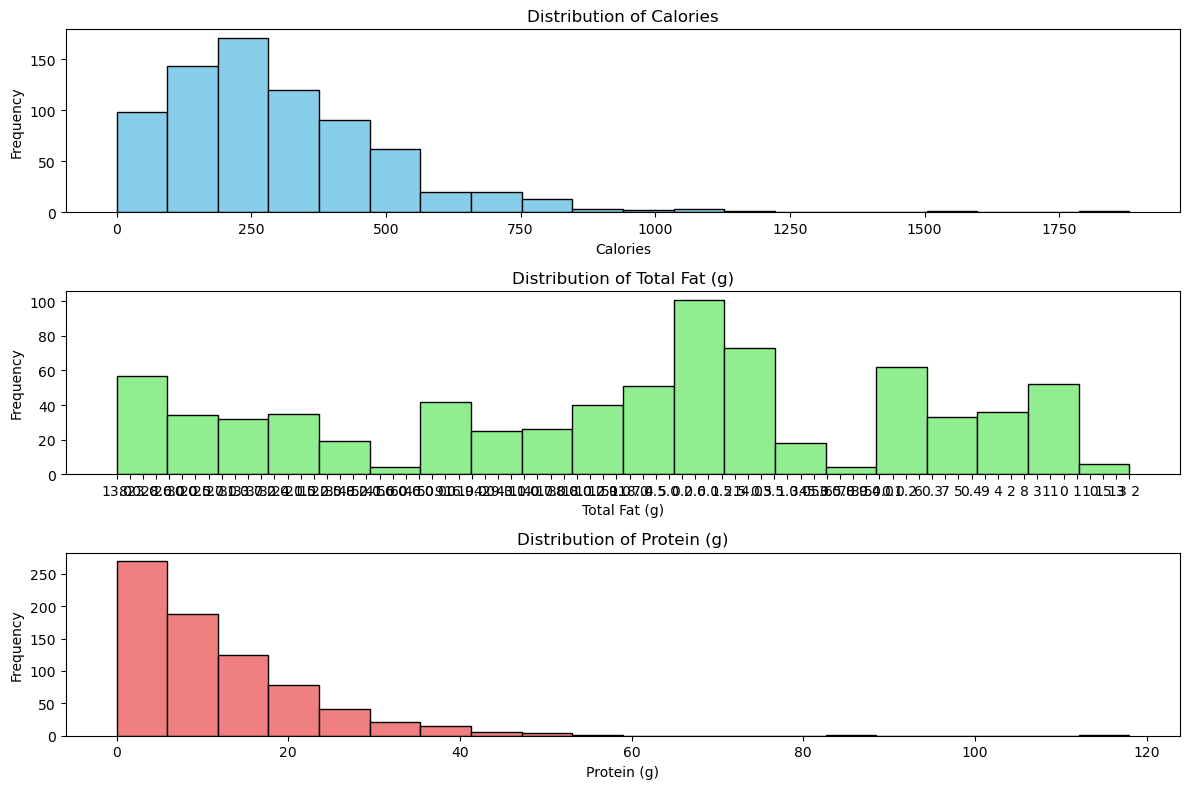

In [32]:
#Question 6

#Summary statistics:

import pandas as pd
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)
summary_stats = df[['calories', 'total fat (g)', 'saturated fat (g)', 'cholesterol (mg)', 
                    'sodium (mg)', 'carbohydrates (g)', 'sugars (g)', 'protein (g)']].describe()
print(summary_stats)





#Visualization:

import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(df['calories'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(df['total fat (g)'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Fat (g)')
plt.xlabel('Total Fat (g)')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
plt.hist(df['protein (g)'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Protein (g)')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()



#Calories: Most fast-food items cluster in the range of 200-400 calories.
#Total Fat: Fat content ranges widely, but most items have between 10-30 grams of fat.
#Protein: Many items contain 10-30 grams of protein, with some outliers offering more.

In [22]:
#Question 7

import plotly.express as px
df = px.data.gapminder()
continent_colors = {
    'Asia': 'red',
    'Europe': 'blue',
    'Africa': 'green',
    'Americas': 'orange',
    'Oceania': 'purple'
}

fig = px.scatter(
    df,
    x="gdpPercap",                
    y="lifeExp",                  
    animation_frame="year",       
    animation_group="country",    
    size="pop",                   
    color="continent",            
    hover_name="country",         
    log_x=True,                   
    size_max=66,                  
    range_x=[300, 150000],        
    range_y=[15, 100],            
    color_discrete_map=continent_colors,  
    category_orders={"continent": ["Europe", "Americas", "Asia", "Oceania", "Africa"]}  
)

fig.update_layout(
    title={
        'text': "Global Economic Development and Life Expectancy Over Time",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Income per Person (Logarithmic Scale)",  
    yaxis_title="People's Expectancy of Life (Years)",    
    font=dict(
        family="Arial",
        size=18,
        color="Black"
    ),
    paper_bgcolor='lightyellow',     
    plot_bgcolor='white',           
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        gridwidth=2,                
        showline=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',            
        ticklen=10,
        tickvals=[300, 1000, 5000, 20000, 100000],  
        ticktext=["300", "1K", "5K", "20K", "100K"]  
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        gridwidth=2,                
        showline=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',           
        ticklen=10,
        tickvals=[20, 40, 60, 80, 100],  
        ticktext=["20", "40", "60", "80", "100"]
    ),
    legend=dict(
        title="Continent",
        orientation="v",             
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        bgcolor="white",
        bordercolor="black",
        borderwidth=1.5
    )
)


fig.update_traces(
    marker=dict(
        line=dict(width=1.5, color='Black'),  
        opacity=0.8,                          
        sizemode="area"                       
    ),
    hovertemplate=(
        "<b>%{hovertext}</b><br><br>" +
        "GDP per Capita: %{x:$,.0f}<br>" +  
        "Life Expectancy: %{y:.1f} years<br>" +
        "Population: %{marker.size:,} people<br>" 
    )
)

fig.add_annotation(
    x=12000,  
    y=75,     
    text="Countries with better wealth and life expectancy",  
    showarrow=True,
    arrowhead=2
)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 800  

fig.show()


In [29]:
#Question 8

import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name'] + " " + bn['sex']

bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

bn = bn.sort_values(['name', 'year'])

bn['percent change'] = bn['percent'].diff()

new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

bn = bn[bn.percent > 0.001]

fig = px.scatter(
    bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
    size="percent", color="sex", hover_name="name", size_max=50, range_x=[-0.005, 0.005]
)

fig.update_yaxes(autorange='reversed')

fig.show()


#Question 9
Somewhat.